<a href="https://colab.research.google.com/github/Edmontong/Bootcamp-25-midterm-Edmon-Alvina/blob/main/Midterm_Edmon%2BAlvina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project

Your midterm project will be a thematic exploration of a dataset of your choice/construction.  To begin, you are to identify a topical area of interest and whether or not you would be interested in working with a small group of your peers [here](https://docs.google.com/forms/d/e/1FAIpQLSeyrSEF1IsErHO_a1bVfcoOm2g5DbBD8rhZ_eyF4HwHkBQZVA/viewform?usp=header).



In [ ]:
#test
#test
#test
#test
#test
#test
#test
#test
#test

## Determining the Data Sources

For your data, you are to either build a dataset utilizing an API or identifying a website or sites to scrape.  These should be related to your topic of interest.  As a starting point, each group member should identify 2-3 resources in the form of an API or website(s) that look like they might be useful for your exploration.  Next class you will have time as a group to drill down specifics from the options you bring to the group.

## Exploratory Questions

You should come up with a few driving questions that you believe the data will give you insight into.  This is very general, and I give some examples of projects that I believe would be meaningful.  These are likely to change a bit as you dig into your data but work to be as specific about feature names and relationships or differences to be explored.

- **EXAMPLE 2**: You and some friends want to start a small investment fund where you pool your resources to make some basic investments in publicly traded companies.  You aim to use some basic balance sheet and cash flow analysis to evaluate the companies investment potential.

  - Data Source: `yfinance` library and `sec` api
  - Problem Statement:
      - Generalize a Valuation strategy and implement this on a selection of publicly listed companies
      - Identify top candidates for investment based on your valuations
      - Modularize the valuation strategy with functions or classes that can be reused for later analysis

Companies: Apple (AAPL), Microsoft(MSFT
), Circle(CRCL), Nvidia(NVDA), Meta (META
), Alphabet (GOOG)

data: Price to Earnings Ratio ; free cash flow;

[yfinance guide](https://algotrading101.com/learn/yfinance-guide/)

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
!pip install yfinance
import yfinance as yf

In [ ]:
tickers = ['AAPL', 'MSFT', 'NVDA', 'META', 'GOOG', 'CRCL']

In [ ]:
data = {}  #For Price to Earnings Ratio

for ticker in tickers:

    stock = yf.Ticker(ticker)
    info = stock.info

    trailing_pe = info.get('trailingPE')   #trailing_pe -> the past 12 months
    forward_pe = info.get('forwardPE')     #forward_pe  -> the next 12 months

    data[ticker] = {
        'Trailing P/E': trailing_pe,
        'Forward P/E': forward_pe
    }

pe_df = pd.DataFrame.from_dict(data, orient = 'index')
pe_df.index.name = 'Ticker'
pe_df

,Trailing P/E,Forward P/E
Ticker,,
AAPL,38.341946,30.359806
MSFT,37.597366,34.353180
NVDA,52.051136,44.470875
META,26.041225,28.336561
GOOG,27.027687,28.356424
CRCL,NaN,101.388280


<Axes: xlabel='Ticker', ylabel='PE Ratio'>

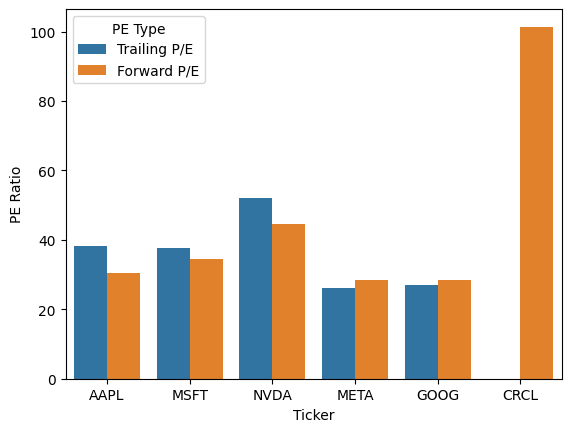

In [ ]:
plot_df = pe_df.stack().reset_index()
plot_df.columns = ['Ticker', 'PE Type', 'PE Ratio']
sns.barplot(
    data=plot_df,
    x='Ticker',
    y='PE Ratio',
    hue='PE Type'
)

In [ ]:
#Freecashflows
#Free cash flow = operating cf - investing cf
freecashflow = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities']
  icf = cf.loc['Cash Flow From Continuing Investing Activities']
  fcf = []
  for i,j in zip(opc, icf):
    k = i - j
    fcf.append(k)
  freecashflow.append(fcf)
df_cf = pd.DataFrame(freecashflow, columns=['2025','2024','2023','2022','2021'])
df_cf.index = tickers
df_cf.style.set_caption('Free Cash Flow (2021–2025)')
df_cf



,2025,2024,2023,2022,2021
AAPL,1.153190e+11,1.068380e+11,1.445050e+11,1.185830e+11,NaN
MSFT,2.087610e+11,2.155180e+11,1.102620e+11,1.193460e+11,NaN
NVDA,8.451000e+10,3.865600e+10,-1.735000e+09,1.893800e+10,NaN
META,1.384780e+11,9.560800e+10,7.944500e+10,6.525300e+10,NaN
GOOG,1.708350e+11,1.288090e+11,1.117930e+11,1.271750e+11,NaN
CRCL,1.582750e+08,-8.370203e+09,8.415897e+09,-6.347500e+07,NaN


Text(0.5, 0, 'Year')

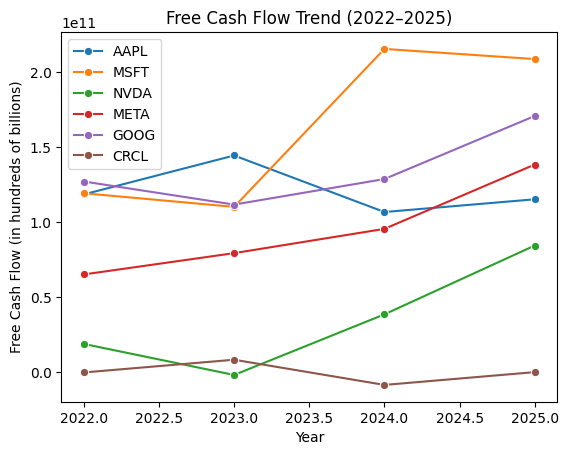

In [ ]:
df_transposed = df_cf.transpose()
df_transposed.index = df_transposed.index.astype(int) # Converts the year strings to numbers (e.g., '2022' becomes 2022)
df_transposed.sort_index(ascending=True, inplace=True)
sns.lineplot(data=df_transposed, dashes=False, marker='o')
plt.title('Free Cash Flow Trend (2022–2025)')
plt.ylabel('Free Cash Flow (in hundreds of billions)')
plt.xlabel('Year')

In [ ]:
#cash conversion ratio
#cash conversion ratio = opc/net income
cash_conversion_ratio = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  incomestatment = ticker.financials
  net_income = incomestatment.loc['Net Income']
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities']
  ccr = []
  for i,j in zip(opc, net_income):
    k = i/j
    ccr.append(k)
  cash_conversion_ratio.append(ccr)
ccr_df = pd.DataFrame(cash_conversion_ratio, columns=['2025','2024','2023','2022','2021'])
ccr_df.index = tickers
ccr_df


,2025,2024,2023,2022,2021
AAPL,1.261564,1.139677,1.223921,1.098838,NaN
MSFT,1.337124,1.345058,1.210348,1.224051,NaN
NVDA,0.879377,0.943884,1.291209,0.933962,NaN
META,1.464529,1.818840,2.175647,1.465151,NaN
GOOG,1.251513,1.378765,1.525629,1.205424,NaN
CRCL,2.213546,0.521629,0.094548,0.181668,NaN


Text(0.5, 0, 'Year')

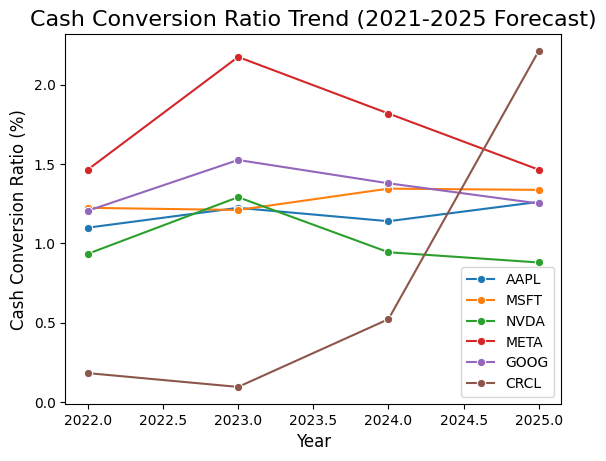

In [ ]:
ccr_plot = ccr_df.transpose()
ccr_plot.index = ccr_plot.index.astype(int)
ccr_plot.sort_index(ascending=True, inplace=True)
sns.lineplot(
    data=ccr_plot,
    dashes=False,
    marker='o',
)

plt.title('Cash Conversion Ratio Trend (2021-2025 Forecast)', fontsize=16)
plt.ylabel('Cash Conversion Ratio (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)

In [ ]:
#Dividends

all_tickers_data = yf.Tickers(tickers)
dividends_data = {}

for ticker in tickers:
    ticker_object = all_tickers_data.tickers[ticker]

    divs = ticker_object.dividends
    divs_df = divs.reset_index()
    divs_df = divs_df.rename(columns={'Dividends': 'Dividend Amount'})

    divs_df['Ticker'] = ticker

    dividends_data[ticker] = divs_df
master_dividends_db = pd.concat(dividends_data.values(), ignore_index=True)

master_dividends_db = master_dividends_db[['Ticker', 'Date', 'Dividend Amount']]

master_dividends_db['Date'] = master_dividends_db['Date'].dt.tz_localize(None)   #Apply boolean indexing to filter the rows by date range
master_dividends_db = master_dividends_db[
    (master_dividends_db['Date'] >= pd.to_datetime('2021-01-01')) &
    (master_dividends_db['Date'] <= pd.to_datetime('2025-12-31'))
]
master_dividends_db

,Ticker,Date,Dividend Amount
69,AAPL,2021-02-05,0.205
70,AAPL,2021-05-07,0.220
71,AAPL,2021-08-06,0.220
72,AAPL,2021-11-05,0.220
73,AAPL,2022-02-04,0.220
...,...,...,...
235,GOOG,2024-09-09,0.200
236,GOOG,2024-12-09,0.200
237,GOOG,2025-03-10,0.200
238,GOOG,2025-06-09,0.210


In [ ]:
#stock: high and lows

stock_data = yf.download(tickers, start="2021-01-01", end="2025-04-30", group_by='tickers')
monthly_last_value = stock_data.resample('M').last()
monthly_last_value

/tmp/ipython-input-2214615227.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start="2021-01-01", end="2025-04-30", group_by='tickers')
[*********************100%***********************]  6 of 6 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CRCL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-01-01 -> 2025-04-30) (Yahoo error = "Data doesn\'t exist for startDate = 1609477200, endDate = 1745985600")')
/tmp/ipython-input-2214615227.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_last_value = stock_data.resample('M').last()


Ticker     CRCL                                        MSFT              \
Price      Open High Low Close Adj Close Volume        Open        High   
Date                                                                      
2021-01-31  NaN  NaN NaN   NaN       NaN    NaN  226.865606  228.817116   
2021-02-28  NaN  NaN NaN   NaN       NaN    NaN  223.090675  226.790703   
2021-03-31  NaN  NaN NaN   NaN       NaN    NaN  224.420379  230.384755   
2021-04-30  NaN  NaN NaN   NaN       NaN    NaN  240.636927  243.855180   
2021-05-31  NaN  NaN NaN   NaN       NaN    NaN  242.409443  243.452481   
2021-06-30  NaN  NaN NaN   NaN       NaN    NaN  261.425553  262.072605   
2021-07-31  NaN  NaN NaN   NaN       NaN    NaN  275.409955  276.848950   
2021-08-31  NaN  NaN NaN   NaN       NaN    NaN  294.563973  294.641370   
2021-09-30  NaN  NaN NaN   NaN       NaN    NaN  276.459753  278.511110   
2021-10-31  NaN  NaN NaN   NaN       NaN    NaN  313.635810  321.251002   
2021-11-30  NaN  NaN NaN   NaN       NaN    NaN  325.057106  327.441806   
2021-12-31  NaN  NaN NaN   NaN       NaN    NaN  328.149525  328.973486   
2022-01-31  NaN  NaN NaN   NaN       NaN    NaN  299.494229  302.819243   
2022-02-28  NaN  NaN NaN   NaN       NaN    NaN  285.892265  290.584136   
2022-03-31  NaN  NaN NaN   NaN       NaN    NaN  304.921934  306.126489   
2022-04-30  NaN  NaN NaN   NaN       NaN    NaN  280.355263  281.588957   
2022-05-31  NaN  NaN NaN   NaN       NaN    NaN  265.351787  267.532778   
2022-06-30  NaN  NaN NaN   NaN       NaN    NaN  250.279499  252.694188   
2022-07-31  NaN  NaN NaN   NaN       NaN    NaN  270.385552  274.572281   
2022-08-31  NaN  NaN NaN   NaN       NaN    NaN  258.948293  260.626515   
2022-09-30  NaN  NaN NaN   NaN       NaN    NaN  232.506104  234.701491   
2022-10-31  NaN  NaN NaN   NaN       NaN    NaN  228.086062  229.217909   
2022-11-30  NaN  NaN NaN   NaN       NaN    NaN  235.392290  249.834610   
2022-12-31  NaN  NaN NaN   NaN       NaN    NaN  233.083083  234.795418   
2023-01-31  NaN  NaN NaN   NaN       NaN    NaN  238.210279  242.613427   
2023-02-28  NaN  NaN NaN   NaN       NaN    NaN  244.319785  246.693630   
2023-03-31  NaN  NaN NaN   NaN       NaN    NaN  278.318696  283.753015   
2023-04-30  NaN  NaN NaN   NaN       NaN    NaN  298.211977  303.038127   
2023-05-31  NaN  NaN NaN   NaN       NaN    NaN  326.665092  330.253299   
2023-06-30  NaN  NaN NaN   NaN       NaN    NaN  332.032732  336.928444   
2023-07-31  NaN  NaN NaN   NaN       NaN    NaN  331.216745  331.983541   
2023-08-31  NaN  NaN NaN   NaN       NaN    NaN  324.312636  325.997241   
2023-09-30  NaN  NaN NaN   NaN       NaN    NaN  313.032594  314.727059   
2023-10-31  NaN  NaN NaN   NaN       NaN    NaN  333.819397  333.967164   
2023-11-30  NaN  NaN NaN   NaN       NaN    NaN  373.627649  375.207101   
2023-12-31  NaN  NaN NaN   NaN       NaN    NaN  371.169642  372.314744   
2024-01-31  NaN  NaN NaN   NaN       NaN    NaN  401.731915  409.984533   
2024-02-29  NaN  NaN NaN   NaN       NaN    NaN  404.136313  409.635033   
2024-03-31  NaN  NaN NaN   NaN       NaN    NaN  416.320506  417.220480   
2024-04-30  NaN  NaN NaN   NaN       NaN    NaN  397.065110  397.727739   
2024-05-31  NaN  NaN NaN   NaN       NaN    NaN  412.900319  412.900319   
2024-06-30  NaN  NaN NaN   NaN       NaN    NaN  448.884843  451.173503   
2024-07-31  NaN  NaN NaN   NaN       NaN    NaN  416.615699  417.883874   
2024-08-31  NaN  NaN NaN   NaN       NaN    NaN  412.503114  414.379014   
2024-09-30  NaN  NaN NaN   NaN       NaN    NaN  425.019114  427.212668   
2024-10-31  NaN  NaN NaN   NaN       NaN    NaN  412.264893  413.058949   
2024-11-30  NaN  NaN NaN   NaN       NaN    NaN  417.794265  422.558097   
2024-12-31  NaN  NaN NaN   NaN       NaN    NaN  423.771431  424.397993   
2025-01-31  NaN  NaN NaN   NaN       NaN    NaN  416.690339  418.390986   
2025-02-28  NaN  NaN NaN   NaN       NaN    NaN  391.297194  396.249945   
2025-03-31  NaN  NaN NaN 